In [1]:
# def Prim
import numpy as np
import pickle


def swap(M):
    # SWAP = q.swap(2, 0, 1).as_unitary()
    SWAP = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    return np.dot(np.dot(SWAP, M), SWAP)


global I
global X
global Y
global Z
I = np.identity(2)
X = np.array([[0,   1], [1,  0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1,   0], [0, -1]])
Z_2 = (1/np.sqrt(2))*np.array([[1+1j, 0+0j], [0+0j, 1-1j]])
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
NCNOT = np.dot(np.dot(np.kron(X, I), CNOT), np.kron(X, I))
Zv_2 = (1/np.sqrt(2))*np.array([[1-1j, 0+0j], [0+0j, 1+1j]])
X_2 = (1/np.sqrt(2))*np.array([[1+0j, 0-1j], [0-1j, 1+0j]])
X_CROT = np.dot(np.kron(Z_2, X_2), CNOT)
Z_CROT = np.dot(np.kron(Z_2, I), NCNOT)
CROT = np.dot(np.kron(Z_2, I), CNOT)

# primitive gates
Prim = [np.kron(I, X_2), swap(np.kron(I, X_2)), X_CROT, swap(
    X_CROT), Z_CROT, swap(Z_CROT), CROT, swap(CROT)]

Zv = [Zv_2]
for i in range(1, 4):
    Zv.append(np.dot(Zv[i-1], Zv_2))

Zv_q1 = [[[['Zv(pi/2)', 1]]],
         [[['Zv(pi)', 1]]],
         [[['Zv(3pi/2)', 1]]],
         [[['Zv(2pi)', 1]]]]

Zv_q2 = [[[['Zv(pi/2)', 2]]],
         [[['Zv(pi)', 2]]],
         [[['Zv(3pi/2)', 2]]],
         [[['Zv(2pi)', 2]]]]

for i in range(4):
    Zv_q1[i].append(np.kron(Zv[i], I))
    Zv_q2[i].append(np.kron(I, Zv[i]))
# get Zv_q1 Zv_q2
for i in range(3):
    Prim.append(np.kron(Zv[i], I))
for i in range(3):
    Prim.append(np.kron(I, Zv[i]))
Prim.append(np.identity(4))
####################################################
# Prim:
# ['X(pi/2)', 2]         = 0
# ['X(pi/2)', 1]         = 1
# ['X(pi/2)+CROT', 2]    = 2
# ['X(pi/2)+CROT', 1]    = 3
# ['Z(pi/2)+CROT', 2]    = 4
# ['Z(pi/2)+CROT', 1]    = 5
# ['CROT', 2]            = 6
# ['CROT', 1]            = 7
#
# ['Zv(pi/2)', 1]        = 8
# ['Zv(pi)', 1]          = 9
# ['Zv(3pi/2)', 1]       = 10
# ['Zv(pi/2)', 2]        = 11
# ['Zv(pi)', 2]          = 12
# ['Zv(3pi/2)', 2]       = 13
#identity               = 14
f = open('perfect_Prim.pkl', 'wb')
pickle.dump(Prim, f)
f.close()

In [2]:
#ESR to prim (add error)
import numpy as np
from scipy.linalg import expm, sinm, cosm
import math
import pickle
Ez = 3.933e10
dEz = 1.326e7
Ω = 410000.0
J = 1.59e6
#supp eqn.7
n = 1
T_pi_2 = math.sqrt(16*n**2-1)/4/J
#perfect gate
def H_RWA1_1d(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 0, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 0, 0],
                                    [0, 1, 0, 0]])

def H_RWA1_1u(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 1, 0],
                                    [0, 0, 0, 0],
                                    [1, 0, 0, 0],
                                    [0, 0, 0, 0]])
def H_RWA1_2d(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 0, 0],
                                    [0, 0, 0, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 1, 0]])

def H_RWA1_2u(w):
    return 1/2*2*np.pi*w*np.array( [[0, 1, 0, 0],
                                    [1, 0, 0, 0],
                                    [0, 0, 0, 0],
                                    [0, 0, 0, 0]])
#cross error
def H_RWA2_1d(w, t):
    return 1/2*2*np.pi*w*np.array( [[                     0, 0, np.exp(-1j*J*2*np.pi*t), 0],
                                    [                     0, 0,                       0, 0],
                                    [np.exp(1j*J*2*np.pi*t), 0,                       0, 0],
                                    [                     0, 0,                       0, 0]] )

def H_RWA2_1u(w, t):
    return 1/2*2*np.pi*w*np.array( [[0,                       0, 0,                       0],
                                    [0,                       0, 0,  np.exp(1j*J*2*np.pi*t)],
                                    [0,                       0, 0,                       0],
                                    [0, np.exp(-1j*J*2*np.pi*t), 0,                       0]] )
def H_RWA2_2d(w, t):
    return 1/2*2*np.pi*w*np.array( [[                     0, np.exp(-1j*J*2*np.pi*t), 0, 0],
                                    [np.exp(1j*J*2*np.pi*t), 0,                       0, 0],
                                    [                     0, 0,                       0, 0],
                                    [                     0, 0,                       0, 0]] )

def H_RWA2_2u(w, t):
    return 1/2*2*np.pi*w*np.array( [[0,0,                       0,                      0],
                                    [0,0,                       0,                      0],
                                    [0,0,                       0, np.exp(1j*J*2*np.pi*t)],
                                    [0,0, np.exp(-1j*J*2*np.pi*t),                      0]] )
#combine perfect and cross error
def H_RWA_1d(w, t):
    return H_RWA1_1d(w) + H_RWA2_1d(w, t)
def H_RWA_1u(w, t):
    return H_RWA1_1u(w) + H_RWA2_1u(w, t)
def H_RWA_2d(w, t):
    return H_RWA1_2d(w) + H_RWA2_2d(w, t)
def H_RWA_2u(w, t):
    return H_RWA1_2u(w) + H_RWA2_2u(w, t)
#time slice
delta = 50
L = np.linspace(0, T_pi_2, delta)

U_1d_plus = np.identity(4)   #Unitary transformation from f_1d pulse. "Plus" indicates that it is a pi/2 rotation.
U_1u_plus = np.identity(4)
U_1d_minus = np.identity(4)
U_1u_minus = np.identity(4)
U_2d_plus = np.identity(4)   #Unitary transformation from f_1d pulse. "Plus" indicates that it is a pi/2 rotation.
U_2u_plus = np.identity(4)
U_2d_minus = np.identity(4)
U_2u_minus = np.identity(4)

for t in L:
    U_1d_plus = np.dot(expm(-1j*H_RWA_1d(Ω, t)*L[1]), U_1d_plus)
    U_1u_plus = np.dot(expm(-1j*H_RWA_1u(Ω, t)*L[1]), U_1u_plus)
    U_1d_minus = np.dot(expm(1j*H_RWA_1d(Ω, t)*L[1]), U_1d_minus)   #TODO:Figure out how to construct -pi/2 pulse physically.
    U_1u_minus = np.dot(expm(1j*H_RWA_1u(Ω, t)*L[1]), U_1u_minus)
    U_2d_plus = np.dot(expm(-1j*H_RWA_2d(Ω, t)*L[1]), U_2d_plus)
    U_2u_plus = np.dot(expm(-1j*H_RWA_2u(Ω, t)*L[1]), U_2u_plus)
    U_2d_minus = np.dot(expm(1j*H_RWA_2d(Ω, t)*L[1]), U_2d_minus)   #TODO:Figure out how to construct -pi/2 pulse physically.
    U_2u_minus = np.dot(expm(1j*H_RWA_2u(Ω, t)*L[1]), U_2u_minus)

X_2_exp_q1 = np.dot(U_1u_plus, U_1d_plus)              #prim1
X_CROT_exp_q1 = np.dot(U_1u_plus, U_1d_minus)          #prim3
Z_CROT_exp_q1 = np.dot(U_1u_plus, U_1u_plus)           #prim5
CROT_exp_q1 = np.dot(U_1d_minus, U_1d_minus)           #prim7
X_2_exp_q2 = np.dot(U_2u_plus, U_2d_plus)              #prim0
X_CROT_exp_q2 = np.dot(U_2u_plus, U_2d_minus)          #prim2
Z_CROT_exp_q2 = np.dot(U_2u_plus, U_2u_plus)           #prim4
CROT_exp_q2 = np.dot(U_2d_minus, U_2d_minus)           #prim6
#print(X_2_exp_q1)
#print(X_2_exp_q2)
#open Prim put into Prim
with open("Prim.pkl", "rb") as f2:  
    Prim = pickle.load(f2)
f2.close()
Prim[1]=X_2_exp_q1
Prim[3]=X_CROT_exp_q1
Prim[5]=Z_CROT_exp_q1
Prim[7]=CROT_exp_q1
Prim[0]=X_2_exp_q2
Prim[2]=X_CROT_exp_q2
Prim[4]=Z_CROT_exp_q2
Prim[6]=CROT_exp_q2
f = open('Prim.pkl', 'wb')
pickle.dump(Prim , f)
f.close()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[0.9420000000000001, 0.812, 0.728, 0.643, 0.608, 0.5539999999999999, 0.478, 0.397, 0.35200000000000004, 0.32899999999999996, 0.317, 0.344, 0.258, 0.304, 0.344, 0.261, 0.29100000000000004, 0.259, 0.231, 0.27399999999999997, 0.273, 0.259, 0.23800000000000002, 0.27699999999999997, 0.299, 0.212, 0.248, 0.28800000000000003, 0.268, 0.27, 0.218, 0.244, 0.259, 0.26899999999999996, 0.265, 0.262, 0.261, 0.22399999999999998]


No handles with labels found to put in legend.


[0.86618436 0.77607271 0.2221481 ]


"\n#############################################################################################################################\nf = open('fitting_data_K=1000.pkl', 'wb')\npickle.dump(Prob_00,f)\n\npickle.dump(m,f)\n#pickle.dump(RB_fit_input,f)\npickle.dump(mean,f)\npickle.dump(np.sqrt(cov[0, 0]),f)\nf.close()\n"

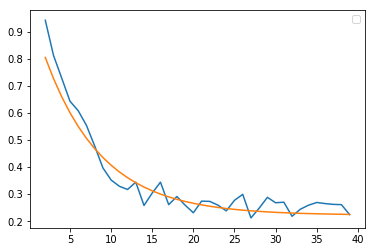

In [1]:
#  given list to get c , c2 c,3...
import numpy as np
import random
import pickle
import math
import qinfer as qi
import ipyparallel
import matplotlib.pyplot as plt
%matplotlib inline
#open Cliff_indices1 put into data
with open("Cliff_indices_4.pkl", "rb") as f:  
    data = pickle.load(f)
f.close()

#open Prim put into Prim
with open("Prim.pkl", "rb") as f2:  
    Prim = pickle.load(f2)
f2.close()

#open Prim_inv put into Prim_inv
with open("Inverse_of_prim.pkl", "rb") as f3:  
    Prim_inv = pickle.load(f3)
f3.close()
####################################################initial state#############################################################
#given probability  NOT Probability amplitude
#[00 , 01 , 10 , 11]
e_ud=0                 #error probability  NOT Probability amplitude
e_du=0                  
e_dd=0
def error_initial_state(e1,e2,e3):
    return np.matrix([[math.sqrt(1-e1*e1-e2*e2-e3*e3),math.sqrt(e1),math.sqrt(e2),math.sqrt(e3)]]).getH()
initial = error_initial_state(e_ud,e_du,e_dd)
####################################################initial state#############################################################
#############################################Randomized Benchmarking##########################################################
#given list , return s = c0*c1*c2....
def get_s(g1):               
    p = np.identity(4)                             # 計數器for p@p1@p2....
    for i in range(len(g1)):
        array = g1[i]
        for j in range(len(array)):
            p = p@Prim[array[j]]                  #s=p*p*p*p*p*p*p....
    return p
#given list , return c^-1 
def c_m(c1):
    p1 = np.identity(4)
    c1.reverse()
    for i in range(len(c1)):
        a = c1[i]
        a.reverse()
        for j in range(len(a)):
            inv_a=Prim_inv[a[j]]
            for k in range(len(inv_a)):
                p1=p1@Prim[inv_a[k]]
    return p1
m = np.arange(2,40,1)                        #sequence length
Prob_00=[]
K=100                       # of S sequence 相同長度 重複取k次
for x in m:
    count =0
    print(x)
    for i in range(K):    
        list2 = random.choices(data,k=x-1)               #data 隨便可重複取m個
        seq_k = get_s(list2)@c_m(list2)                  # k_th seq
#############################################Randomized Benchmarking##########################################################
#############################################Readout##########################################################################
        e_readout=0
        final_prob=np.square(np.abs(seq_k@initial))
        final_prob[0]=final_prob[0]*(1-e_readout)
        uu_count=[1,0,0,0]
        a=random.choices(uu_count,weights=final_prob, k=10)
        count=count+sum(a)
    Prob_00.append(count/10/K)
print(Prob_00)
RB_fit_input=np.column_stack(([i *10* K for i in Prob_00],m,10*K*np.ones_like(m)))
#mean_0, cov_0, extra_0 = qi.simple_est_rb(RB_fit_input,interleaved=False,return_all=True, n_particles=100000,p_min=0.9)
mean, cov, extra = qi.simple_est_rb(RB_fit_input,interleaved=False,return_all=True, n_particles=100000)

plt.plot(m,Prob_00)
#plt.plot(m,mean_0[1]*mean_0[0]**m+mean_0[2], label='p_min=0.9')
plt.plot(m,mean[1]*mean[0]**m+mean[2])
plt.legend(loc='upper right')
#print(mean_0)
print(mean)

'''
#############################################################################################################################
f = open('fitting_data_K=1000.pkl', 'wb')
pickle.dump(Prob_00,f)

pickle.dump(m,f)
#pickle.dump(RB_fit_input,f)
pickle.dump(mean,f)
pickle.dump(np.sqrt(cov[0, 0]),f)
f.close()
'''

In [ ]:
#fitting
import numpy as np
import random
import pickle
import math
import ipyparallel
import qinfer as qi
with open('fitting_data_K=10000.pkl', "rb") as f3:  
    K_10000_Prob_00 = pickle.load(f3)
    K_10000_m = pickle.load(f3)
    K_10000_RB_fit_input = pickle.load(f3)
f3.close()
mean, cov, extra = qi.simple_est_rb(K_10000_RB_fit_input, interleaved=False, p_min=0.0, p_max=1.0, n_particles=100000000, return_all=True)
f = open('rb_fitting_data_K=10000.pkl', 'wb')
pickle.dump(mean,f)
pickle.dump(np.sqrt(cov[0,0]),f)
f.close()


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
with open('fitting_data_K=100.pkl', "rb") as f1:  
    K_100_Prob_00 = pickle.load(f1)
    K_100_m = pickle.load(f1)
    K_100_mean = pickle.load(f1)
    K_100_sd = pickle.load(f1)
f1.close()
with open('fitting_data_K=1000.pkl', "rb") as f2:  
    K_1000_Prob_00 = pickle.load(f2)
    K_1000_m = pickle.load(f2)
    K_1000_mean = pickle.load(f2)
    K_1000_sd = pickle.load(f2)
f2.close()
# rb_fitting
with open('fitting_data_K=10000.pkl', "rb") as f3:  
    K_10000_Prob_00 = pickle.load(f3)
    K_10000_m = pickle.load(f3)
    K_10000_RB_fit_input = pickle.load(f3)
f3.close()
with open('fitting_data_K=100000.pkl', "rb") as f4:  
    K_100000_Prob_00 = pickle.load(f4)
    K_100000_m = pickle.load(f4)
    K_100000_RB_fit_input = pickle.load(f4)
f4.close()
#l_100, = plt.plot(K_100_m, K_100_y, label='K=100')
#l_1000, = plt.plot(K_1000_m, K_1000_y, label='K=1000')
#l_10000, = plt.plot(K_10000_m, K_10000_y, label='K=10000')
#l_100000, = plt.plot(K_100000_m, K_100000_y, label='K=100000')
#plt.legend(loc='upper right')
#plt.xlabel('Sequence Length')
#plt.ylabel('Probability |00>')
print("Estimated F_100: {:0.4f} ".format(1-((1-K_100_mean[0])*0.75)))
print("Estimated F_1000: {:0.4f} ".format(1-((1-K_1000_mean[0])*0.75)))
print("Estimated F_10000: {:0.4f} ".format(1-((1-K_10000_mean[0])*0.75)))
print("Estimated F_100000: {:0.4f} ".format(1-((1-K_100000_mean[0])*0.75)))
print("Estimated p_100: {:0.4f} ".format(K_100_mean[0]))
print("Estimated p_1000: {:0.4f} ".format(K_1000_mean[0]))
print("Estimated p_10000: {:0.4f} ".format(K_10000_mean[0]))
print("Estimated p_100000: {:0.4f} ".format(K_100000_mean[0]))
print("Estimated A_100: {:0.4f} ".format(K_100_mean[1]))
print("Estimated A_1000: {:0.4f} ".format(K_1000_mean[1]))
print("Estimated A_10000: {:0.4f} ".format(K_10000_mean[1]))
print("Estimated A_100000: {:0.4f} ".format(K_100000_mean[1]))
print("Estimated B_100: {:0.4f} ".format(K_100_mean[2]))
print("Estimated B_1000: {:0.4f} ".format(K_1000_mean[2]))
print("Estimated B_10000: {:0.4f} ".format(K_10000_mean[2]))
print("Estimated B_100000: {:0.4f} ".format(K_100000_mean[2]))
plt.plot(K_1000_m,K_1000_mean[1]*K_1000_mean[0]**K_1000_m+K_1000_mean[2])

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
with open('fitting_data_K=1000.pkl', "rb") as f2:  
    K_1000_Prob_00 = pickle.load(f2)
    K_1000_m = pickle.load(f2)
    K_1000_mean = pickle.load(f2)
    K_1000_sd = pickle.load(f2)
f2.close()
a=np.array(K_1000_Prob_00)*100
plt.plot(K_1000_m,a)
print(K_1000_mean)

plt.plot(K_1000_m,K_1000_mean[1]*K_1000_mean[0]**K_1000_m+K_1000_mean[2])

In [1]:
# F per Clifford
import numpy as np
import random
import pickle
import math
import qinfer as qi
import ipyparallel
import matplotlib.pyplot as plt
%matplotlib inline
#open Cliff_indices1 put into data
with open("Cliff_indices_4.pkl", "rb") as f:  
    data = pickle.load(f)
f.close()

#open Prim put into Prim
with open("Prim.pkl", "rb") as f2:  
    Prim = pickle.load(f2)
f2.close()
#open Prim put into Prim
with open("perfect_Prim.pkl", "rb") as f4:  
    Prim_perf = pickle.load(f4)
f4.close()
#open Prim_inv put into Prim_inv
with open("Inverse_of_prim.pkl", "rb") as f3:  
    Prim_inv = pickle.load(f3)
f3.close()
#############################################Randomized Benchmarking##########################################################
#given list , return s = c0*c1*c2....
def get_s(g1):               
    p = np.identity(4)                             # 計數器for p@p1@p2....
    for j in range(len(g1)):
            p = p@Prim[g1[j]]                  #s=p*p*p*p*p*p*p....
    return p
def get_s_perf(g1):               
    p = np.identity(4)                             # 計數器for p@p1@p2....
    for j in range(len(g1)):
            p = p@Prim_perf[g1[j]]                  #s=p*p*p*p*p*p*p....
    return p
#given list , return c^-1 
def c_m(c1):
    p1 = np.identity(4)
    a = c1
    a.reverse()
    for j in range(len(a)):
        inv_a=Prim_inv[a[j]]
        for k in range(len(inv_a)):
            p1=p1@Prim[inv_a[k]]
    return p1
def c_m_perf(c1):
    p1 = np.identity(4)
    a = c1
    a.reverse()
    for j in range(len(a)):
        inv_a=Prim_inv[a[j]]
        for k in range(len(inv_a)):
            p1=p1@Prim_perf[inv_a[k]]
    return p1
count =0
final_prob=[]
#for i in range(11520):
#    final_prob.append(np.absolute(np.trace(np.asmatrix(get_s_perf(data[i])).getH()@np.asmatrix(get_s(data[i]))))/4)            
#############################################11520 clifford##########################################################
#############################################Readout##########################################################################
print(data[25])
print(np.asmatrix(get_s_perf(data[25])).getH()@np.asmatrix(get_s(data[25])))
print(get_s(data[25]))
#q=np.asmatrix(get_s_perf(data[25])).getH()@get_s(data[25])
print(Prim_perf[12]@Prim_perf[2]@Prim_perf[8]@Prim_perf[11])
#print("Estimated F: {:0.4f} ± {:0.4f}".format(sum(final_prob),np.std(final_prob)))


[12, 2, 8, 11]
[[ 0.77374603-0.6334878j  -0.00282576-0.00151705j  0.        +0.j
   0.        +0.j        ]
 [-0.00151705-0.00282576j  0.6334878 -0.77374603j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.70354748+0.70368635j
  -0.07081704-0.06950834j]
 [ 0.        +0.j          0.        +0.j         -0.06950834-0.07081704j
  -0.70368635+0.70354748j]]
[[-0.70427127-0.06795771j -0.70296256+0.07230052j  0.        +0.j
   0.        +0.j        ]
 [ 0.07230052-0.70296256j  0.06795771+0.70427127j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.07023213-0.70427127j
   0.07009326+0.70296256j]
 [ 0.        +0.j          0.        +0.j         -0.70296256-0.07009326j
  -0.70427127-0.07023213j]]
[[-0.5-0.5j -0.5-0.5j  0. +0.j   0. +0.j ]
 [ 0.5-0.5j -0.5+0.5j  0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j  -0.5+0.5j  0.5-0.5j]
 [ 0. +0.j   0. +0.j   0.5+0.5j  0.5+0.5j]]
